In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('auto-mpg.csv')
df.head()
# drop horsepower column
df.drop('horsepower', axis=1, inplace=True)

In [2]:
print("Presence of null values:" + str(df.isnull().values.any()))

Presence of null values:False


In [3]:
car_names = df['car name']
df['type'] = [1 if 'diesel' in element else 0 for element in car_names]

In [4]:
df.pop('car name')
df.head()

,mpg,cylinders,displacement,weight,acceleration,model year,origin,type
0,18.0,8,307.0,3504,12.0,70,1,0
1,15.0,8,350.0,3693,11.5,70,1,0
2,18.0,8,318.0,3436,11.0,70,1,0
3,16.0,8,304.0,3433,12.0,70,1,0
4,17.0,8,302.0,3449,10.5,70,1,0


EDA

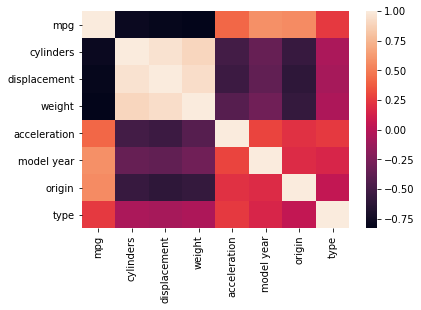

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.corr()
sns.heatmap(corr)
plt.show()

<AxesSubplot:>

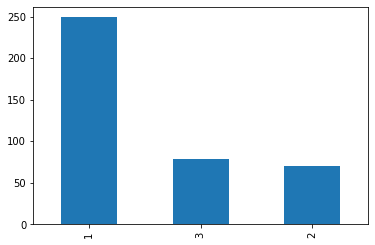

In [6]:
pd.value_counts(df['origin']).plot.bar()

<AxesSubplot:>

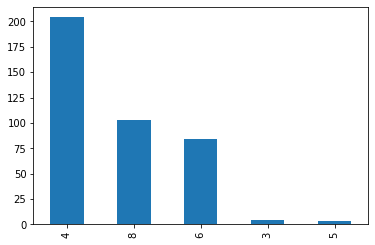

In [7]:
pd.value_counts(df['cylinders']).plot.bar()

<AxesSubplot:xlabel='origin', ylabel='mpg'>

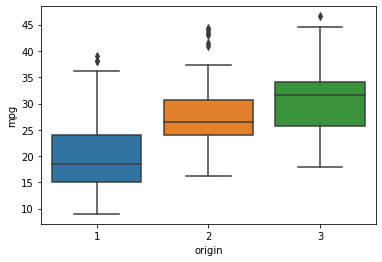

In [8]:
sns.boxplot(x = 'origin', y = 'mpg', data = df)

<AxesSubplot:xlabel='origin', ylabel='mpg'>

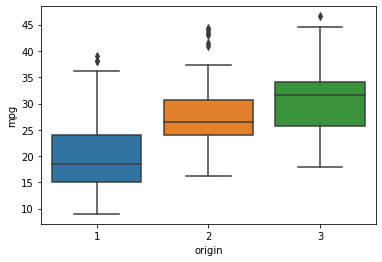

In [9]:
sns.boxplot(x = 'origin', y = 'mpg', data = df)

Model Training

In [10]:
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [11]:
x = df.drop('mpg', axis = 1)
y = df['mpg']


In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)


In [13]:
from sklearn.model_selection import train_test_split
training,test = train_test_split(df, train_size = 0.7, test_size = 0.3,shuffle=True)
training, valid = train_test_split(training, train_size = 0.7, test_size =0.3,shuffle=True)
training_label = training.pop('mpg')
test_label = test.pop('mpg')
valid_label = valid.pop('mpg')

In [14]:
xgb = XGBRegressor()
dtc = DecisionTreeRegressor()
rfc = RandomForestRegressor()
knn = KNeighborsRegressor(n_neighbors=3)

xgb.fit(training, training_label)
dtc.fit(training, training_label)
rfc.fit(training, training_label)
knn.fit(training, training_label)


KNeighborsRegressor(n_neighbors=3)

Testing

In [15]:
xgb_predict = xgb.predict(test)
dtc_predict = dtc.predict(test)
rfc_predict = rfc.predict(test)
knn_predict = knn.predict(test)

In [16]:
from sklearn.metrics import mean_squared_error
import math
accuracy = dict()
accuracy['XGBoost'] = math.sqrt(mean_squared_error(test_label, xgb_predict)) 
accuracy['DecisionTree'] = math.sqrt(mean_squared_error(test_label,dtc_predict))
accuracy['RandomForest'] = math.sqrt(mean_squared_error(test_label,rfc_predict))
accuracy['KNN'] = math.sqrt(mean_squared_error(test_label,knn_predict))
print(accuracy)

{'XGBoost': 2.797081227213842, 'DecisionTree': 3.540386042980812, 'RandomForest': 2.9278897904463554, 'KNN': 4.487342280319247}


Validation testing

In [17]:
xgb_predict = xgb.predict(valid) 
dtc_predict = dtc.predict(valid) 
rfc_predict = rfc.predict(valid) 
knn_predict = knn.predict(valid)

accuracy['XGBoost'] = math.sqrt(mean_squared_error(valid_label, xgb_predict)) 
accuracy['DecisionTree'] = math.sqrt(mean_squared_error(valid_label,dtc_predict))
accuracy['RandomForest'] = math.sqrt(mean_squared_error(valid_label,rfc_predict))
accuracy['KNN'] = math.sqrt(mean_squared_error(valid_label,knn_predict))
print(accuracy)

{'XGBoost': 2.2980936072558675, 'DecisionTree': 3.0668348815148474, 'RandomForest': 2.423530747837603, 'KNN': 4.754733091613742}


In [18]:
results = pd.DataFrame({'label mpg': valid_label,'prediction': xgb.predict(valid)})
results.head()

,label mpg,prediction
35,17.0,19.012188
357,32.9,26.992594
324,40.8,38.208786
132,25.0,21.423006
224,15.0,15.306767


,Algorithms,Percentage
0,XGBoost,2.298094
1,DecisionTree,3.066835
2,RandomForest,2.423531
3,KNN,4.754733


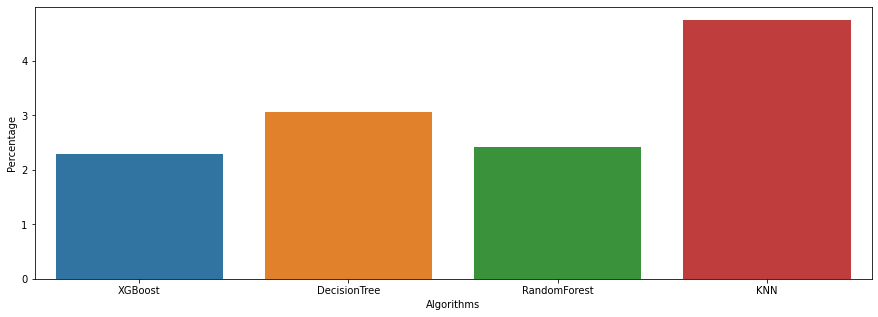

In [19]:
fig, (ax1) = plt.subplots(ncols=1, sharey=True,figsize=(15,5))
new_df=pd.DataFrame(list(accuracy.items()),columns=['Algorithms','Percentage'])
display(new_df)
sns.barplot(x="Algorithms", y="Percentage", data=new_df,ax=ax1);

In [20]:
max_accuracy = min(accuracy,key=accuracy.get)
max_accuracy

'XGBoost'